In [125]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
df= pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 681 entries, title to binary_rating
dtypes: category(1), float64(679), object(1)
memory usage: 104.0+ MB


In [3]:
list(df.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [5]:
df.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

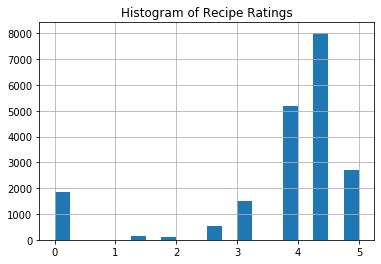

In [6]:
df.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [7]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
from sklearn.svm import SVR

svr = SVR()

X = df.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)

Y = df.rating.sample(frac=0.3, replace=True, random_state=1)

svr.fit(X,Y)

/Users/colette/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

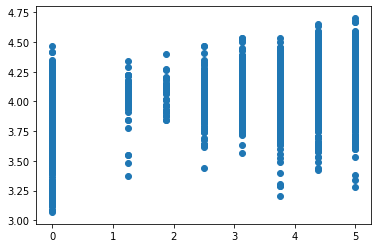

In [9]:
plt.scatter(Y, svr.predict(X))

In [10]:
svr.score(X, Y)

-0.003978314483867873

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

/Users/colette/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/colette/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/colette/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/colette/anaconda3/lib/python3.7/site-packa

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

In [44]:
df['binary_rating'] = pd.cut(df['rating'], bins=2, labels=['0','1'])

In [45]:
low_filter = df.loc[df['rating']<=3.0]
high_filter = df.loc[df['rating']>3.0]

In [46]:
#confirmation division between high and low rating
high_filter.sort_values(by=['rating'], ascending=True)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,binary_rating
8601,Crawfish Tomato étouffée in Puff Pastry Shells,3.125,1220.0,24.0,83.0,1100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6524,Bacon-Cheddar Burgers with Caramelized Onions,3.125,961.0,60.0,63.0,2203.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
15208,Sour Cream Cake with Cardamom and Pistachios,3.125,444.0,9.0,22.0,315.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6529,Semisweet Chocolate Layer Cake with Vanilla Cr...,3.125,752.0,7.0,39.0,267.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6533,Irish Stew,3.125,2517.0,85.0,44.0,1124.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
15202,Herbed Orzo with Toasted Pine Nuts,3.125,315.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6536,"Stir-Fried Beef, Broccoli, and Yams",3.125,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9269,White Bean Purée with Garlic Vinaigrette and C...,3.125,277.0,10.0,14.0,68.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18379,Couscous à la Greque,3.125,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2259,Mozzarella in Carrozza,3.125,86.0,4.0,4.0,158.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [47]:
low_filter.sort_values(by=['rating'], ascending=False)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,binary_rating
0,"Lentil, Apple, and Turkey Wrap",2.5,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
8872,Lemon Vinaigrette,2.5,162.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8571,Roasted-Beet and Apple Relish,2.5,147.0,2.0,0.0,413.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8576,Slow-Cooker Oatmeal With Apples and Ginger,2.5,212.0,6.0,3.0,241.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8614,Sweet Garlic Soy Sauce,2.5,443.0,11.0,1.0,7032.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8619,Coconut Macaroons,2.5,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8653,Banana Fritters,2.5,736.0,5.0,38.0,224.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8709,"Black Barley, Fennel, and Radish Salad",2.5,454.0,9.0,25.0,77.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8723,Italian Tuna and Shaved Fennel Sandwich with B...,2.5,251.0,24.0,15.0,490.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8724,Cumin Steak with Rajas,2.5,311.0,23.0,20.0,97.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [52]:
X = df.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium', 'binary_rating'], 1)

y = df.binary_rating

In [53]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [54]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [55]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8776595744680851


In [65]:
df.binary_rating.dtypes

CategoricalDtype(categories=['0', '1'], ordered=True)

In [76]:
df.astype({'binary_rating': 'int64'})

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,binary_rating
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [148]:
df_new = df.drop(['title'], 1)

In [149]:
pd.options.display.float_format = '{:.6f}'.format

c = df_new.corr().abs()

s = c.unstack()
s['rating'].to_excel('moist.xlsx')

In [150]:
df_new = df_new[['drink', 'alcoholic', 'house & garden', 'gin', 'spirit', 'cocktail', 'cocktail party', 'bitters', 'bon appétit', 'harpercollins', 'peanut free', 'soy free', 'liqueur', 'rum', 'tree nut free', 'non-alcoholic', 'bake', 'condiment', 'roast', 'fall', 'sauté', 'brandy', 'fortified wine', 'pernod', 'créme de cacao', 'dinner', 'weelicious', 'chartreuse', 'kosher', 'lime juice', 'binary_rating']]

In [151]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 31 columns):
drink             20052 non-null float64
alcoholic         20052 non-null float64
house & garden    20052 non-null float64
gin               20052 non-null float64
spirit            20052 non-null float64
cocktail          20052 non-null float64
cocktail party    20052 non-null float64
bitters           20052 non-null float64
bon appétit       20052 non-null float64
harpercollins     20052 non-null float64
peanut free       20052 non-null float64
soy free          20052 non-null float64
liqueur           20052 non-null float64
rum               20052 non-null float64
tree nut free     20052 non-null float64
non-alcoholic     20052 non-null float64
bake              20052 non-null float64
condiment         20052 non-null float64
roast             20052 non-null float64
fall              20052 non-null float64
sauté             20052 non-null float64
brandy            20052 non-nu

In [152]:
X = df_new.drop(['binary_rating'], 1)

y = df_new.binary_rating

In [153]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [193]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [190]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8746675531914894


In [194]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [195]:
cm

array([[ 100,  697],
       [  57, 5162]])

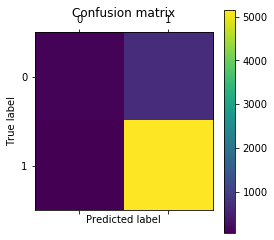

In [196]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [197]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  100
False Positives:  697
False Negatives:  57
True Positives:  5162


In [202]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

Precision 0.88
Recall 0.99
F1 Score 0.93
